In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'S:\\lab_winter\\martin\\MED14_PRO-seq_final\\plots\\' # directory for output plots

In [2]:
####################################
#### load in all the gene lists ####
####################################

SE_464_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\SE_464_genes.xlsx')
TF_53_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\TF_53_genes.xlsx')
autoreg_24_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\autoregulatory_6motifs_24_genes.xlsx')
CRC_29_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\CRC_incl_MYB_29_genes.xlsx')
CRC_old_22_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\CRC_old_22_genes.xlsx')

In [3]:
######################################
##### load pause-initiation data #####
######################################
# MJ-19-30 new method pause-initiation dataframe
#old_PI_df = pd.read_csv('S:\\lab_winter\\martin\\MED14_PRO-seq_final\\other_final_files\\pause-initiation-modeling\\MED14as.estimates.txt', sep="\t")
PI_df = pd.read_csv('S:\\lab_winter\\martin\\MED14_PRO-seq_final\\other_final_files\\pause-initiation-modeling\\Combined.MED14as.estimates.txt', sep="\t")

SE_464_PI = PI_df[PI_df.gene_id.str.contains('|'.join(SE_464_genes.geneID.tolist()), na=False)]
TF_53_PI = PI_df[PI_df.gene_id.str.contains('|'.join(TF_53_genes.geneID.tolist()), na=False)]
autoreg_PI = PI_df[PI_df.gene_id.str.contains('|'.join(autoreg_24_genes.geneID.tolist()), na=False)]
CRC_29_PI = PI_df[PI_df.gene_id.str.contains('|'.join(CRC_29_genes.geneID.tolist()), na=False)]
CRC_old_PI = PI_df[PI_df.gene_id.str.contains('|'.join(CRC_old_22_genes.geneID.tolist()), na=False)]

clean_PI_df = PI_df.dropna()
clean_PI_df = clean_PI_df[~clean_PI_df.isin([np.inf]).any(1)]


<Figure size 360x360 with 0 Axes>

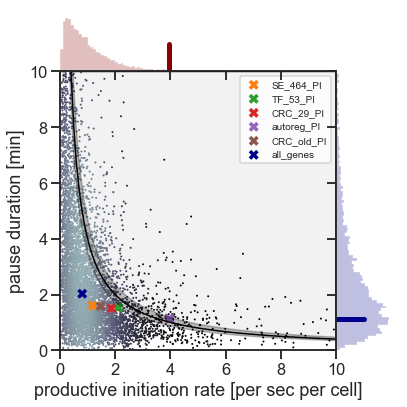

<Figure size 360x360 with 0 Axes>

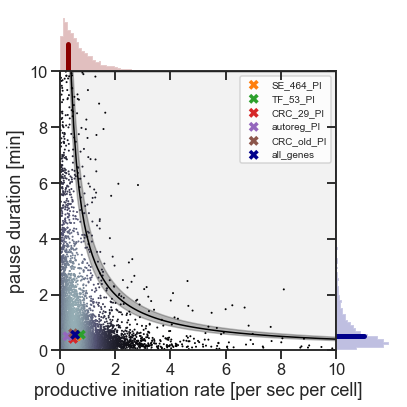

<Figure size 360x360 with 0 Axes>

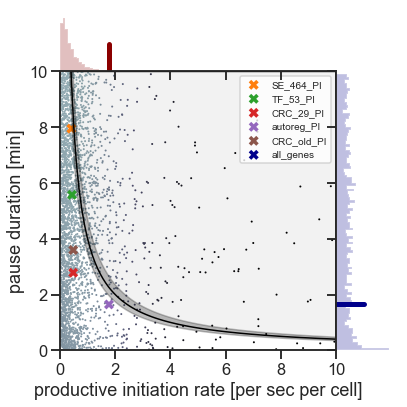

<Figure size 360x360 with 0 Axes>

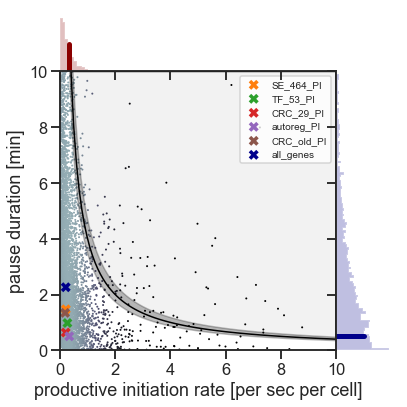

In [4]:
###########################################
##### plot pause-initiation landscape #####
###########################################

all_sets = [SE_464_PI, TF_53_PI, CRC_29_PI, autoreg_PI, CRC_old_PI]
all_set_names = ["SE_464_PI", "TF_53_PI", "CRC_29_PI", "autoreg_PI", "CRC_old_PI"]

for condition in ["2ndDMSO2h", "2nddTAG72h", "2ndNVP230", "2nddTAG72hNVP230"]:

    ### make jointGrid plot
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(5,5))

    # for plotting kernel density colormap
    xy = np.vstack([clean_PI_df['initiation.rate.per.cell.{0}'.format(condition)],clean_PI_df['pause.duration.{0}'.format(condition)]])
    z = sc.stats.gaussian_kde(xy)(xy)

    # make jointGrid
    g = sns.JointGrid(x='initiation.rate.per.cell.{0}'.format(condition), y='pause.duration.{0}'.format(condition), data=clean_PI_df, space=0, xlim=(0,10), ylim=(0,10))

    g = g.plot_joint(plt.scatter, s=4, cmap="bone", c=z, vmin=z.min(), vmax=1.5*z.max(), linewidth=0)

    _ = g.ax_marg_x.hist(clean_PI_df['initiation.rate.per.cell.{0}'.format(condition)], color="darkred", alpha=.25, bins=np.arange(0,10,.1), density=True, histtype="stepfilled")
    _ = g.ax_marg_y.hist(clean_PI_df['pause.duration.{0}'.format(condition)], color="darkblue", alpha=.25, bins=np.arange(0,10,.1), density=True, histtype="stepfilled", orientation="horizontal")
    _ = g.ax_marg_x.axvline(x=autoreg_PI['initiation.rate.per.cell.{0}'.format(condition)].median(), ymax=0.5, color="darkred", linewidth=5)
    _ = g.ax_marg_y.axhline(y=autoreg_PI['pause.duration.{0}'.format(condition)].median(), xmax=0.5, color="darkblue", linewidth=5)

    
    #### make central pause-initiation limit
    x = np.linspace(200./(10*50), 10, num=100)
    y = (200./50)/np.linspace(200./(10*50), 10, num=100)
    x = np.append(x, 10)
    y = np.append(y, 10)

    plt.fill(x,y, edgecolor="#000000", facecolor="#0000000D")

    # make confidence intervals
    uncertainty = 0.15
    x1 = np.linspace(200./((10*50)*(1 + uncertainty)), 10, num=100)
    x2 = np.linspace(200./((10*50)*(1 - uncertainty)), 10, num=100)[::-1]
    y1 = (200./(50*(1 + uncertainty)))/np.linspace(200./(10*50*(1 + uncertainty)), 10, num=100)
    y2 = (200./(50*(1 - uncertainty)))/np.linspace(200./(10*50*(1 - uncertainty)), 10, num=100)[::-1]

    plt.fill(np.append(x1, x2),np.append(y1, y2), alpha=.25, color="#000000")

    
    counter = 0
    for geneset in all_sets:
        plt.scatter(x=geneset['initiation.rate.per.cell.{0}'.format(condition)].median(), y=geneset['pause.duration.{0}'.format(condition)].median(), marker="X", s=100, label=all_set_names[counter], edgecolors="none")
        counter += 1

    plt.scatter(x=clean_PI_df['initiation.rate.per.cell.{0}'.format(condition)].median(), y=clean_PI_df['pause.duration.{0}'.format(condition)].median(), marker="X", s=100, c="darkblue", label="all_genes", edgecolors="none")
       
    # formatting
    plt.legend(loc="upper right", fontsize=10)
    plt.xlabel('productive initiation rate [per sec per cell]')
    plt.ylabel('pause duration [min]')

    # save
    #plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_{0}_jointPlot_all-genesets_boneR_10x10.pdf'.format(condition), dpi=300)
    #plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_{0}_jointPlot_all-genesets_boneR_10x10.png'.format(condition), dpi=300)
    plt.show()

<Figure size 360x360 with 0 Axes>

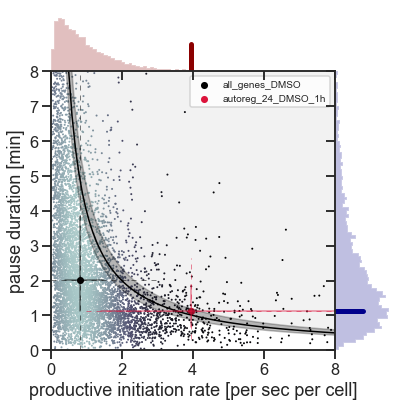

In [5]:
###########################################
##### plot pause-initiation landscape DMSO only #####
###########################################

all_sets = [SE_464_PI, TF_53_PI, CRC_29_PI, autoreg_PI, CRC_old_PI]
all_set_names = ["SE_464_PI", "TF_53_PI", "CRC_29_PI", "autoreg_PI", "CRC_old_PI"]

### make jointGrid plot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(5,5))

# for plotting kernel density colormap
xy = np.vstack([clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'],clean_PI_df['pause.duration.2ndDMSO2h']])
z = sc.stats.gaussian_kde(xy)(xy)



# make jointGrid
g = sns.JointGrid(x='initiation.rate.per.cell.2ndDMSO2h', y='pause.duration.2ndDMSO2h', data=clean_PI_df, space=0, xlim=(0,8), ylim=(0,8))

# cmap Bone
#g = g.plot_joint(plt.scatter, s=4, cmap="bone", c=z, vmin=z.min(), vmax=1.5*z.max(), linewidth=0)
# cmap inferno
g = g.plot_joint(plt.scatter, s=4, cmap="bone", c=z, vmin=z.min(), vmax=1.3*z.max(), linewidth=0)

_ = g.ax_marg_x.hist(clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'], color="darkred", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled")
_ = g.ax_marg_y.hist(clean_PI_df['pause.duration.2ndDMSO2h'], color="darkblue", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled", orientation="horizontal")

#_ = g.ax_marg_x.axvline(x=clean_PI_df['initiation.rate.per.cell.DMSO1h'].median(), ymax=0.5, color="black", linewidth=5)
#_ = g.ax_marg_y.axhline(y=clean_PI_df['pause.duration.DMSO1h'].median(), xmax=0.5, color="black", linewidth=5)

_ = g.ax_marg_x.axvline(x=autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].median(), ymax=0.5, color="darkred", linewidth=5)
_ = g.ax_marg_y.axhline(y=autoreg_PI['pause.duration.2ndDMSO2h'].median(), xmax=0.5, color="darkblue", linewidth=5)


#### make central pause-initiation limit
x = np.linspace(200./(10*50), 10, num=100)
y = (200./50)/np.linspace(200./(10*50), 10, num=100)
x = np.append(x, 10)
y = np.append(y, 10)

plt.fill(x,y, edgecolor="#000000", facecolor="#0000000D")

# make confidence intervals
x1 = np.linspace(200./((10*50)*(1 + uncertainty)), 10, num=100)
x2 = np.linspace(200./((10*50)*(1 - uncertainty)), 10, num=100)[::-1]
y1 = (200./(50*(1 + uncertainty)))/np.linspace(200./(10*50*(1 + uncertainty)), 10, num=100)
y2 = (200./(50*(1 - uncertainty)))/np.linspace(200./(10*50*(1 - uncertainty)), 10, num=100)[::-1]

plt.fill(np.append(x1, x2),np.append(y1, y2), alpha=.25, color="#000000")


#### plot X median markers (DMSO and 1h)
plt.scatter(x=clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].median(), y=clean_PI_df['pause.duration.2ndDMSO2h'].median(), marker="o", s=50, c="black", label="all_genes_DMSO", linewidths=0)
plt.plot([clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].median()], [clean_PI_df['pause.duration.2ndDMSO2h'].median()], color="black", linewidth=2)

plt.scatter(x=autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].median(), y=autoreg_PI['pause.duration.2ndDMSO2h'].median(), marker="o", s=50, c="crimson", label="autoreg_24_DMSO_1h", linewidths=0)
plt.plot([autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].median()], [autoreg_PI['pause.duration.2ndDMSO2h'].median()], color="crimson", linewidth=2)



#### plot dashed lines as whiskers (1.5*(0.75p - 0.25p quartile range))
## autoregulatory TFs
# initiation freq.
IQR_autoreg_init=autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.75) - autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.25)
low_autoreg_whis_init = max([autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].min(), autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.25) - 1.5*IQR_autoreg_init])
hi_autoreg_whis_init = min([autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].max(), autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.75) + 1.5*IQR_autoreg_init])
plt.plot([low_autoreg_whis_init, hi_autoreg_whis_init], [autoreg_PI['pause.duration.2ndDMSO2h'].median(),autoreg_PI['pause.duration.2ndDMSO2h'].median()], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_autoreg_pause=autoreg_PI['pause.duration.2ndDMSO2h'].quantile(q=0.75) - autoreg_PI['pause.duration.2ndDMSO2h'].quantile(q=0.25)
low_autoreg_whis_pause = max([autoreg_PI['pause.duration.2ndDMSO2h'].min(), autoreg_PI['pause.duration.2ndDMSO2h'].quantile(q=0.25) - 1.5*IQR_autoreg_pause])
hi_autoreg_whis_pause = min([autoreg_PI['pause.duration.2ndDMSO2h'].max(), autoreg_PI['pause.duration.2ndDMSO2h'].quantile(q=0.75) + 1.5*IQR_autoreg_pause])
plt.plot([autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].median(), autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].median()], [low_autoreg_whis_pause, hi_autoreg_whis_pause], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
## all_genes
# initiation freq.
IQR_all_init=clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.75) - clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.25)
low_all_whis_init = max([clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].min(), clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.25) - 1.5*IQR_all_init])
hi_all_whis_init = min([clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].max(), clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.75) + 1.5*IQR_all_init])
plt.plot([low_all_whis_init, hi_all_whis_init], [clean_PI_df['pause.duration.2ndDMSO2h'].median(),clean_PI_df['pause.duration.2ndDMSO2h'].median()], color="black", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_all_pause=clean_PI_df['pause.duration.2ndDMSO2h'].quantile(q=0.75) - clean_PI_df['pause.duration.2ndDMSO2h'].quantile(q=0.25)
low_all_whis_pause = max([clean_PI_df['pause.duration.2ndDMSO2h'].min(), clean_PI_df['pause.duration.2ndDMSO2h'].quantile(q=0.25) - 1.5*IQR_all_pause])
hi_all_whis_pause = min([clean_PI_df['pause.duration.2ndDMSO2h'].max(), clean_PI_df['pause.duration.2ndDMSO2h'].quantile(q=0.75) + 1.5*IQR_all_pause])
plt.plot([clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].median(), clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].median()], [low_all_whis_pause, hi_all_whis_pause], color="black", dashes=[5,5], alpha=0.5, linewidth=1)

## plot solid lines as IQR (0.75p - 0.25p quartile range)
# autoregulatory TFs
plt.plot([autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].median(),autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].median()], [autoreg_PI['pause.duration.2ndDMSO2h'].quantile(q=0.25), autoreg_PI['pause.duration.2ndDMSO2h'].quantile(q=0.75)], color="crimson", alpha=0.5, linewidth=1.5)
plt.plot([autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.25),autoreg_PI['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.75)], [autoreg_PI['pause.duration.2ndDMSO2h'].median(), autoreg_PI['pause.duration.2ndDMSO2h'].median()], color="crimson", alpha=0.5, linewidth=1.5)
# all_genes
plt.plot([clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].median(),clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].median()], [clean_PI_df['pause.duration.2ndDMSO2h'].quantile(q=0.25), clean_PI_df['pause.duration.2ndDMSO2h'].quantile(q=0.75)], color="black", alpha=0.5, linewidth=1.5)
plt.plot([clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.25),clean_PI_df['initiation.rate.per.cell.2ndDMSO2h'].quantile(q=0.75)], [clean_PI_df['pause.duration.2ndDMSO2h'].median(), clean_PI_df['pause.duration.2ndDMSO2h'].median()], color="black", alpha=0.5, linewidth=1.5)


# formatting
plt.legend(loc="upper right", fontsize=10)
plt.xlabel('productive initiation rate [per sec per cell]')
plt.ylabel('pause duration [min]')

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_jointPlot_autoReg_boneR_8x8_DMSOonly.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\pause-initiation_jointPlot_autoReg_boneR_8x8_DMSOonly.png', dpi=300)
plt.show()

<Figure size 360x360 with 0 Axes>

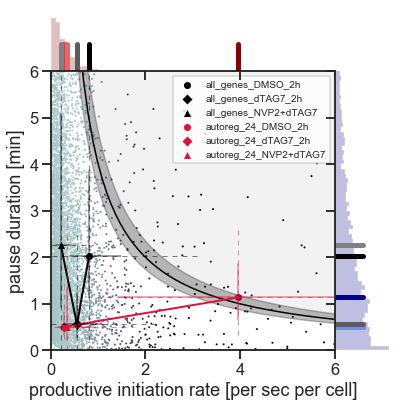

In [6]:
###########################################
##### plot pause-initiation landscape #####
###########################################

all_sets = [SE_464_PI, TF_53_PI, CRC_29_PI, autoreg_PI, CRC_old_PI]
all_set_names = ["SE_464_PI", "TF_53_PI", "CRC_29_PI", "autoreg_PI", "CRC_old_PI"]

conditions = ["2ndDMSO2h", "2nddTAG72h", "2ndNVP230", "2nddTAG72hNVP230"]

### make jointGrid plot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(5,5))

# for plotting kernel density colormap
xy = np.vstack([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])],clean_PI_df['pause.duration.{0}'.format(conditions[3])]])
z = sc.stats.gaussian_kde(xy)(xy)



# make jointGrid
g = sns.JointGrid(x='initiation.rate.per.cell.{0}'.format(conditions[3]), y='pause.duration.{0}'.format(conditions[3]), data=clean_PI_df, space=0, xlim=(0,6), ylim=(0,6))

# cmap Bone
#g = g.plot_joint(plt.scatter, s=4, cmap="bone", c=z, vmin=z.min(), vmax=1.5*z.max(), linewidth=0)
# cmap inferno
g = g.plot_joint(plt.scatter, s=4, cmap="bone", c=z, vmin=z.min(), vmax=1.3*z.max(), linewidth=0)

#_ = g.ax_marg_x.hist(clean_PI_df['initiation.rate.per.cell.DMSO1h'], color="darkred", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled")
#_ = g.ax_marg_y.hist(clean_PI_df['pause.duration.DMSO1h'], color="darkblue", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled", orientation="horizontal")
_ = g.ax_marg_x.hist(clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])], color="darkred", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled")
_ = g.ax_marg_y.hist(clean_PI_df['pause.duration.{0}'.format(conditions[3])], color="darkblue", alpha=.25, bins=np.arange(0,10,.1), histtype="stepfilled", orientation="horizontal")

_ = g.ax_marg_x.axvline(x=autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].median(), ymax=0.5, color="darkred", linewidth=5)
_ = g.ax_marg_y.axhline(y=autoreg_PI['pause.duration.{0}'.format(conditions[0])].median(), xmax=0.5, color="darkblue", linewidth=5)
_ = g.ax_marg_x.axvline(x=autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].median(), ymax=0.5, color="#e63737", linewidth=5)
_ = g.ax_marg_y.axhline(y=autoreg_PI['pause.duration.{0}'.format(conditions[1])].median(), xmax=0.5, color="#426ee3", linewidth=5)
_ = g.ax_marg_x.axvline(x=autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].median(), ymax=0.5, color="#e86666", linewidth=5)
_ = g.ax_marg_y.axhline(y=autoreg_PI['pause.duration.{0}'.format(conditions[3])].median(), xmax=0.5, color="#7190e3", linewidth=5)

_ = g.ax_marg_x.axvline(x=clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].median(), ymax=0.5, color="black", linewidth=5)
_ = g.ax_marg_y.axhline(y=clean_PI_df['pause.duration.{0}'.format(conditions[0])].median(), xmax=0.5, color="black", linewidth=5)
_ = g.ax_marg_x.axvline(x=clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].median(), ymax=0.5, color="#5c5c5c", linewidth=5)
_ = g.ax_marg_y.axhline(y=clean_PI_df['pause.duration.{0}'.format(conditions[1])].median(), xmax=0.5, color="#5c5c5c", linewidth=5)
_ = g.ax_marg_x.axvline(x=clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].median(), ymax=0.5, color="#808080", linewidth=5)
_ = g.ax_marg_y.axhline(y=clean_PI_df['pause.duration.{0}'.format(conditions[3])].median(), xmax=0.5, color="#808080", linewidth=5)


#### make central pause-initiation limit
x = np.linspace(200./(10*50), 10, num=100)
y = (200./50)/np.linspace(200./(10*50), 10, num=100)
x = np.append(x, 10)
y = np.append(y, 10)

plt.fill(x,y, edgecolor="#000000", facecolor="#0000000D")

# make confidence intervals
x1 = np.linspace(200./((10*50)*(1 + uncertainty)), 10, num=100)
x2 = np.linspace(200./((10*50)*(1 - uncertainty)), 10, num=100)[::-1]
y1 = (200./(50*(1 + uncertainty)))/np.linspace(200./(10*50*(1 + uncertainty)), 10, num=100)
y2 = (200./(50*(1 - uncertainty)))/np.linspace(200./(10*50*(1 - uncertainty)), 10, num=100)[::-1]

plt.fill(np.append(x1, x2),np.append(y1, y2), alpha=.25, color="#000000")



#### plot X median markers (DMSO and 1h)
plt.scatter(x=clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].median(), y=clean_PI_df['pause.duration.{0}'.format(conditions[0])].median(), marker="o", s=50, c="black", label="all_genes_DMSO_2h", linewidths=0)
plt.scatter(x=clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].median(), y=clean_PI_df['pause.duration.{0}'.format(conditions[1])].median(), marker="D", s=50, c="black", label="all_genes_dTAG7_2h", linewidths=0)
plt.scatter(x=clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].median(), y=clean_PI_df['pause.duration.{0}'.format(conditions[3])].median(), marker="^", s=50, c="black", label="all_genes_NVP2+dTAG7", linewidths=0)
plt.plot([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].median(), clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].median()], [clean_PI_df['pause.duration.{0}'.format(conditions[0])].median(), clean_PI_df['pause.duration.{0}'.format(conditions[1])].median()], color="black", linewidth=2)
plt.plot([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].median(), clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].median()], [clean_PI_df['pause.duration.{0}'.format(conditions[1])].median(), clean_PI_df['pause.duration.{0}'.format(conditions[3])].median()], color="black", linewidth=2)

plt.scatter(x=autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].median(), y=autoreg_PI['pause.duration.{0}'.format(conditions[0])].median(), marker="o", s=50, c="crimson", label="autoreg_24_DMSO_2h", linewidths=0)
plt.scatter(x=autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].median(), y=autoreg_PI['pause.duration.{0}'.format(conditions[1])].median(), marker="D", s=50, c="crimson", label="autoreg_24_dTAG7_2h", linewidths=0)
plt.scatter(x=autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].median(), y=autoreg_PI['pause.duration.{0}'.format(conditions[3])].median(), marker="^", s=50, c="crimson", label="autoreg_24_NVP2+dTAG7", linewidths=0)
plt.plot([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].median(), autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].median()], [autoreg_PI['pause.duration.{0}'.format(conditions[0])].median(), autoreg_PI['pause.duration.{0}'.format(conditions[1])].median()], color="crimson", linewidth=2)
plt.plot([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].median(), autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].median()], [autoreg_PI['pause.duration.{0}'.format(conditions[1])].median(), autoreg_PI['pause.duration.{0}'.format(conditions[3])].median()], color="crimson", linewidth=2)



#### plot dashed lines as whiskers (1.5*(0.75p - 0.25p quartile range))
## autoregulatory TFs
# initiation freq.
IQR_autoreg_init=autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.75) - autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.25)
low_autoreg_whis_init = max([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].min(), autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.25) - 1.5*IQR_autoreg_init])
hi_autoreg_whis_init = min([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].max(), autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.75) + 1.5*IQR_autoreg_init])
plt.plot([low_autoreg_whis_init, hi_autoreg_whis_init], [autoreg_PI['pause.duration.{0}'.format(conditions[0])].median(),autoreg_PI['pause.duration.{0}'.format(conditions[0])].median()], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_autoreg_pause=autoreg_PI['pause.duration.{0}'.format(conditions[0])].quantile(q=0.75) - autoreg_PI['pause.duration.{0}'.format(conditions[0])].quantile(q=0.25)
low_autoreg_whis_pause = max([autoreg_PI['pause.duration.{0}'.format(conditions[0])].min(), autoreg_PI['pause.duration.{0}'.format(conditions[0])].quantile(q=0.25) - 1.5*IQR_autoreg_pause])
hi_autoreg_whis_pause = min([autoreg_PI['pause.duration.{0}'.format(conditions[0])].max(), autoreg_PI['pause.duration.{0}'.format(conditions[0])].quantile(q=0.75) + 1.5*IQR_autoreg_pause])
plt.plot([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].median(), autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].median()], [low_autoreg_whis_pause, hi_autoreg_whis_pause], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
## all_genes
# initiation freq.
IQR_all_init=clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.75) - clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.25)
low_all_whis_init = max([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].min(), clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.25) - 1.5*IQR_all_init])
hi_all_whis_init = min([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].max(), clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.75) + 1.5*IQR_all_init])
plt.plot([low_all_whis_init, hi_all_whis_init], [clean_PI_df['pause.duration.{0}'.format(conditions[0])].median(),clean_PI_df['pause.duration.{0}'.format(conditions[0])].median()], color="black", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_all_pause=clean_PI_df['pause.duration.{0}'.format(conditions[0])].quantile(q=0.75) - clean_PI_df['pause.duration.{0}'.format(conditions[0])].quantile(q=0.25)
low_all_whis_pause = max([clean_PI_df['pause.duration.{0}'.format(conditions[0])].min(), clean_PI_df['pause.duration.{0}'.format(conditions[0])].quantile(q=0.25) - 1.5*IQR_all_pause])
hi_all_whis_pause = min([clean_PI_df['pause.duration.{0}'.format(conditions[0])].max(), clean_PI_df['pause.duration.{0}'.format(conditions[0])].quantile(q=0.75) + 1.5*IQR_all_pause])
plt.plot([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].median(), clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].median()], [low_all_whis_pause, hi_all_whis_pause], color="black", dashes=[5,5], alpha=0.5, linewidth=1)

## plot solid lines as IQR (0.75p - 0.25p quartile range)
# autoregulatory TFs
plt.plot([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].median(),autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].median()], [autoreg_PI['pause.duration.{0}'.format(conditions[0])].quantile(q=0.25), autoreg_PI['pause.duration.{0}'.format(conditions[0])].quantile(q=0.75)], color="crimson", alpha=0.5, linewidth=1.5)
plt.plot([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.25),autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.75)], [autoreg_PI['pause.duration.{0}'.format(conditions[0])].median(), autoreg_PI['pause.duration.{0}'.format(conditions[0])].median()], color="crimson", alpha=0.5, linewidth=1.5)
# all_genes
plt.plot([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].median(),clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].median()], [clean_PI_df['pause.duration.{0}'.format(conditions[0])].quantile(q=0.25), clean_PI_df['pause.duration.{0}'.format(conditions[0])].quantile(q=0.75)], color="black", alpha=0.5, linewidth=1.5)
plt.plot([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.25),clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])].quantile(q=0.75)], [clean_PI_df['pause.duration.{0}'.format(conditions[0])].median(), clean_PI_df['pause.duration.{0}'.format(conditions[0])].median()], color="black", alpha=0.5, linewidth=1.5)


######## same for the 1h median points
#### plot dashed lines as whiskers (1.5*(0.75p - 0.25p quartile range))
## autoregulatory TFs
# initiation freq.
IQR_autoreg_init=autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.75) - autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.25)
low_autoreg_whis_init = max([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].min(), autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.25) - 1.5*IQR_autoreg_init])
hi_autoreg_whis_init = min([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].max(), autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.75) + 1.5*IQR_autoreg_init])
plt.plot([low_autoreg_whis_init, hi_autoreg_whis_init], [autoreg_PI['pause.duration.{0}'.format(conditions[1])].median(),autoreg_PI['pause.duration.{0}'.format(conditions[1])].median()], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_autoreg_pause=autoreg_PI['pause.duration.{0}'.format(conditions[1])].quantile(q=0.75) - autoreg_PI['pause.duration.{0}'.format(conditions[1])].quantile(q=0.25)
low_autoreg_whis_pause = max([autoreg_PI['pause.duration.{0}'.format(conditions[1])].min(), autoreg_PI['pause.duration.{0}'.format(conditions[1])].quantile(q=0.25) - 1.5*IQR_autoreg_pause])
hi_autoreg_whis_pause = min([autoreg_PI['pause.duration.{0}'.format(conditions[1])].max(), autoreg_PI['pause.duration.{0}'.format(conditions[1])].quantile(q=0.75) + 1.5*IQR_autoreg_pause])
plt.plot([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].median(), autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].median()], [low_autoreg_whis_pause, hi_autoreg_whis_pause], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
## all_genes
# initiation freq.
IQR_all_init=clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.75) - clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.25)
low_all_whis_init = max([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].min(), clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.25) - 1.5*IQR_all_init])
hi_all_whis_init = min([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].max(), clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.75) + 1.5*IQR_all_init])
plt.plot([low_all_whis_init, hi_all_whis_init], [clean_PI_df['pause.duration.{0}'.format(conditions[1])].median(),clean_PI_df['pause.duration.{0}'.format(conditions[1])].median()], color="black", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_all_pause=clean_PI_df['pause.duration.{0}'.format(conditions[1])].quantile(q=0.75) - clean_PI_df['pause.duration.{0}'.format(conditions[1])].quantile(q=0.25)
low_all_whis_pause = max([clean_PI_df['pause.duration.{0}'.format(conditions[1])].min(), clean_PI_df['pause.duration.{0}'.format(conditions[1])].quantile(q=0.25) - 1.5*IQR_all_pause])
hi_all_whis_pause = min([clean_PI_df['pause.duration.{0}'.format(conditions[1])].max(), clean_PI_df['pause.duration.{0}'.format(conditions[1])].quantile(q=0.75) + 1.5*IQR_all_pause])
plt.plot([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].median(), clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].median()], [low_all_whis_pause, hi_all_whis_pause], color="black", dashes=[5,5], alpha=0.5, linewidth=1)

## plot solid lines as IQR (0.75p - 0.25p quartile range)
# autoregulatory TFs
plt.plot([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].median(),autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].median()], [autoreg_PI['pause.duration.{0}'.format(conditions[1])].quantile(q=0.25), autoreg_PI['pause.duration.{0}'.format(conditions[1])].quantile(q=0.75)], color="crimson", alpha=0.5, linewidth=1.5)
plt.plot([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.25),autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.75)], [autoreg_PI['pause.duration.{0}'.format(conditions[1])].median(), autoreg_PI['pause.duration.{0}'.format(conditions[1])].median()], color="crimson", alpha=0.5, linewidth=1.5)
# all_genes
plt.plot([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].median(),clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].median()], [clean_PI_df['pause.duration.{0}'.format(conditions[1])].quantile(q=0.25), clean_PI_df['pause.duration.{0}'.format(conditions[1])].quantile(q=0.75)], color="black", alpha=0.5, linewidth=1.5)
plt.plot([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.25),clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])].quantile(q=0.75)], [clean_PI_df['pause.duration.{0}'.format(conditions[1])].median(), clean_PI_df['pause.duration.{0}'.format(conditions[1])].median()], color="black", alpha=0.5, linewidth=1.5)


######## same for the 3rd median points
#### plot dashed lines as whiskers (1.5*(0.75p - 0.25p quartile range))
## autoregulatory TFs
# initiation freq.
IQR_autoreg_init=autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.75) - autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.25)
low_autoreg_whis_init = max([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].min(), autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.25) - 1.5*IQR_autoreg_init])
hi_autoreg_whis_init = min([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].max(), autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.75) + 1.5*IQR_autoreg_init])
plt.plot([low_autoreg_whis_init, hi_autoreg_whis_init], [autoreg_PI['pause.duration.{0}'.format(conditions[3])].median(),autoreg_PI['pause.duration.{0}'.format(conditions[3])].median()], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_autoreg_pause=autoreg_PI['pause.duration.{0}'.format(conditions[3])].quantile(q=0.75) - autoreg_PI['pause.duration.{0}'.format(conditions[3])].quantile(q=0.25)
low_autoreg_whis_pause = max([autoreg_PI['pause.duration.{0}'.format(conditions[3])].min(), autoreg_PI['pause.duration.{0}'.format(conditions[3])].quantile(q=0.25) - 1.5*IQR_autoreg_pause])
hi_autoreg_whis_pause = min([autoreg_PI['pause.duration.{0}'.format(conditions[3])].max(), autoreg_PI['pause.duration.{0}'.format(conditions[3])].quantile(q=0.75) + 1.5*IQR_autoreg_pause])
plt.plot([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].median(), autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].median()], [low_autoreg_whis_pause, hi_autoreg_whis_pause], color="crimson", dashes=[5,5], alpha=0.5, linewidth=1)
## all_genes
# initiation freq.
IQR_all_init=clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.75) - clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.25)
low_all_whis_init = max([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].min(), clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.25) - 1.5*IQR_all_init])
hi_all_whis_init = min([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].max(), clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.75) + 1.5*IQR_all_init])
plt.plot([low_all_whis_init, hi_all_whis_init], [clean_PI_df['pause.duration.{0}'.format(conditions[3])].median(),clean_PI_df['pause.duration.{0}'.format(conditions[3])].median()], color="black", dashes=[5,5], alpha=0.5, linewidth=1)
# pause duration
IQR_all_pause=clean_PI_df['pause.duration.{0}'.format(conditions[3])].quantile(q=0.75) - clean_PI_df['pause.duration.{0}'.format(conditions[3])].quantile(q=0.25)
low_all_whis_pause = max([clean_PI_df['pause.duration.{0}'.format(conditions[3])].min(), clean_PI_df['pause.duration.{0}'.format(conditions[3])].quantile(q=0.25) - 1.5*IQR_all_pause])
hi_all_whis_pause = min([clean_PI_df['pause.duration.{0}'.format(conditions[3])].max(), clean_PI_df['pause.duration.{0}'.format(conditions[3])].quantile(q=0.75) + 1.5*IQR_all_pause])
plt.plot([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].median(), clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].median()], [low_all_whis_pause, hi_all_whis_pause], color="black", dashes=[5,5], alpha=0.5, linewidth=1)

## plot solid lines as IQR (0.75p - 0.25p quartile range)
# autoregulatory TFs
plt.plot([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].median(),autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].median()], [autoreg_PI['pause.duration.{0}'.format(conditions[3])].quantile(q=0.25), autoreg_PI['pause.duration.{0}'.format(conditions[3])].quantile(q=0.75)], color="crimson", alpha=0.5, linewidth=1.5)
plt.plot([autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.25),autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.75)], [autoreg_PI['pause.duration.{0}'.format(conditions[3])].median(), autoreg_PI['pause.duration.{0}'.format(conditions[3])].median()], color="crimson", alpha=0.5, linewidth=1.5)
# all_genes
plt.plot([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].median(),clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].median()], [clean_PI_df['pause.duration.{0}'.format(conditions[3])].quantile(q=0.25), clean_PI_df['pause.duration.{0}'.format(conditions[3])].quantile(q=0.75)], color="black", alpha=0.5, linewidth=1.5)
plt.plot([clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.25),clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])].quantile(q=0.75)], [clean_PI_df['pause.duration.{0}'.format(conditions[3])].median(), clean_PI_df['pause.duration.{0}'.format(conditions[3])].median()], color="black", alpha=0.5, linewidth=1.5)


# formatting
plt.legend(loc="upper right", fontsize=10)
plt.xlabel('productive initiation rate [per sec per cell]')
plt.ylabel('pause duration [min]')

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\MJ-19-30_pause-initiation_jointPlot_autoReg_boneR_6x6_combined.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\MJ-19-30_pause-initiation_jointPlot_autoReg_boneR_6x6_combined.png', dpi=300)
plt.show()

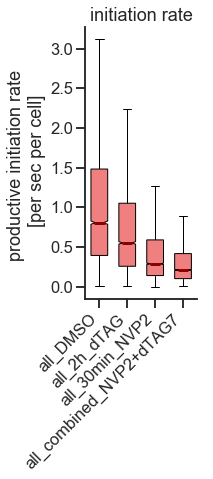

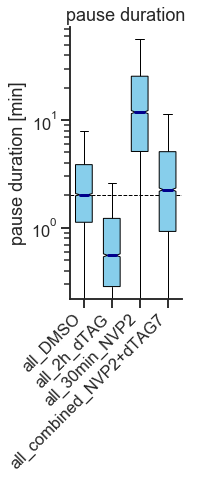

INITIATION 	 all_DMSO vs. all_1h_dTAG 	MannwhitneyuResult(statistic=19090813.0, pvalue=9.257135288512448e-103)
PAUSE DURATION 	 all_DMSO vs. all_1h_dTAG 	MannwhitneyuResult(statistic=9819585.5, pvalue=0.0)


In [7]:
##########################################
##### plot pause-initiation boxplots #####
##########################################

all_sets = [SE_464_PI, TF_53_PI, CRC_29_PI, autoreg_PI, CRC_old_PI]
all_set_names = ["SE_464_PI", "TF_53_PI", "CRC_29_PI", "autoreg_PI", "CRC_old_PI"]

conditions = ["2ndDMSO2h", "2nddTAG72h", "2ndNVP230", "2nddTAG72hNVP230"]

#### initiation rate
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(2,5))

# plotting all individual
#plt.boxplot(x=[clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])], clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])], SE_464_PI['initiation.rate.per.cell.{0}'.format(conditions[0])], SE_464_PI['initiation.rate.per.cell.{0}'.format(conditions[1])], TF_53_PI['initiation.rate.per.cell.{0}'.format(conditions[0])], TF_53_PI['initiation.rate.per.cell.{0}'.format(conditions[1])], CRC_29_PI['initiation.rate.per.cell.{0}'.format(conditions[0])], CRC_29_PI['initiation.rate.per.cell.{0}'.format(conditions[1])], autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])], autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])]], sym='', labels=["all_DMSO", "all_1h_dTAG", "464_SE_1h_DMSO", "464_SE_1h_dTAG", "53_TFs_1h_DMSO", "53_TFs_1h_dTAG", "29_CRC_1h_DMSO", "29_CRC_1h_dTAG", "24_autoreg_1h_DMSO", "24_autoreg_1h_dTAG"], medianprops=dict(color="darkred", linewidth=3), patch_artist=True, boxprops=dict(facecolor="lightcoral"))

# plotting only all_genes
plt.boxplot(x=[clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])], clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])], clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[2])], clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])]], notch=True, labels=["all_DMSO", "all_2h_dTAG", "all_30min_NVP2", "all_combined_NVP2+dTAG7"], showfliers=False, medianprops=dict(color="darkred", linewidth=3), widths=0.6, patch_artist=True, boxprops=dict(facecolor="lightcoral"))


# formatting
plt.title("initiation rate")
plt.xticks(rotation=45, ha="right")
plt.ylabel('productive initiation rate \n [per sec per cell]')
sns.despine()

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\MJ-19-30_initiation-rate_boxplot_all_genes_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\MJ-19-30_initiation-rate_boxplot_all_genes_1x5.png', dpi=300)
plt.show()



#### pause duration
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(2,5))

# plotting all individual
#plt.boxplot(x=[clean_PI_df['pause.duration.{0}'.format(conditions[0])], clean_PI_df['pause.duration.{0}'.format(conditions[1])], SE_464_PI['pause.duration.{0}'.format(conditions[0])].dropna(), SE_464_PI['pause.duration.{0}'.format(conditions[1])].dropna(), TF_53_PI['pause.duration.{0}'.format(conditions[0])].dropna(), TF_53_PI['pause.duration.{0}'.format(conditions[1])].dropna(), CRC_29_PI['pause.duration.{0}'.format(conditions[0])].dropna(), CRC_29_PI['pause.duration.{0}'.format(conditions[1])].dropna(), autoreg_PI['pause.duration.{0}'.format(conditions[0])], autoreg_PI['pause.duration.{0}'.format(conditions[1])]], sym='', labels=["all_DMSO", "all_1h_dTAG", "464_SE_1h_DMSO", "464_SE_1h_dTAG", "53_TFs_1h_DMSO", "53_TFs_1h_dTAG", "29_CRC_1h_DMSO", "29_CRC_1h_dTAG", "24_autoreg_1h_DMSO", "24_autoreg_1h_dTAG"], manage_xticks=True, patch_artist=True, medianprops=dict(color="darkblue", linewidth=3), boxprops=dict(facecolor="skyblue"))

# DMSO median line
plt.axhline(y=clean_PI_df['pause.duration.{0}'.format(conditions[0])].median(), linestyle="--", linewidth=1, color="black")

# plotting only all_genes
plt.boxplot(x=[clean_PI_df['pause.duration.{0}'.format(conditions[0])], clean_PI_df['pause.duration.{0}'.format(conditions[1])], clean_PI_df['pause.duration.{0}'.format(conditions[2])], clean_PI_df['pause.duration.{0}'.format(conditions[3])]], notch=True, labels=["all_DMSO", "all_2h_dTAG", "all_30min_NVP2", "all_combined_NVP2+dTAG7"], widths=0.6, showfliers=False, manage_xticks=True, patch_artist=True, medianprops=dict(color="darkblue", linewidth=3), boxprops=dict(facecolor="skyblue"))


# formatting
plt.title("pause duration")
plt.xticks(rotation=45, ha="right")
plt.ylabel('pause duration [min]')
plt.yscale('log')
sns.despine()

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\MJ-19-30_pause-duration_boxplot_all_genes_logScale_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\MJ-19-30_pause-duration_boxplot_all_genes_logScale_1x5.png', dpi=300)
plt.show()

print "INITIATION \t all_DMSO vs. all_1h_dTAG \t", sc.stats.mannwhitneyu(clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])], clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[1])])
print "PAUSE DURATION \t all_DMSO vs. all_1h_dTAG \t", sc.stats.mannwhitneyu(clean_PI_df['pause.duration.{0}'.format(conditions[0])], clean_PI_df['pause.duration.{0}'.format(conditions[1])])

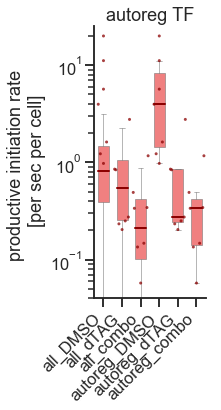

INITIATION 	 autoreg_DMSO vs. autoreg_2h_dTAG 	MannwhitneyuResult(statistic=17468.0, pvalue=0.09803278235171886)
INITIATION 	 autoreg_2hdTAG vs. autoreg_combo 	MannwhitneyuResult(statistic=13793.0, pvalue=0.023606852516357187)


In [29]:
##########################################
##### plot pause-initiation boxplots #####
##########################################

all_sets = [SE_464_PI, TF_53_PI, CRC_29_PI, autoreg_PI, CRC_old_PI]
all_set_names = ["SE_464_PI", "TF_53_PI", "CRC_29_PI", "autoreg_PI", "CRC_old_PI"]

conditions = ["2ndDMSO2h", "2nddTAG72h", "2ndNVP230", "2nddTAG72hNVP230"]

#### initiation rate
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(2,5))

# plotting all individual
#plt.boxplot(x=[autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])], autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])], SE_464_PI['initiation.rate.per.cell.{0}'.format(conditions[0])], SE_464_PI['initiation.rate.per.cell.{0}'.format(conditions[1])], TF_53_PI['initiation.rate.per.cell.{0}'.format(conditions[0])], TF_53_PI['initiation.rate.per.cell.{0}'.format(conditions[1])], CRC_29_PI['initiation.rate.per.cell.{0}'.format(conditions[0])], CRC_29_PI['initiation.rate.per.cell.{0}'.format(conditions[1])], autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[0])], autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])]], sym='', labels=["all_DMSO", "all_1h_dTAG", "464_SE_1h_DMSO", "464_SE_1h_dTAG", "53_TFs_1h_DMSO", "53_TFs_1h_dTAG", "29_CRC_1h_DMSO", "29_CRC_1h_dTAG", "24_autoreg_1h_DMSO", "24_autoreg_1h_dTAG"], medianprops=dict(color="darkred", linewidth=3), patch_artist=True, boxprops=dict(facecolor="lightcoral"))

# plotting only all_genes
df=pd.concat([clean_PI_df.iloc[:,[8, 9,11]], autoreg_PI.iloc[:,[8, 9,11]]], axis=1, sort=True)
df.columns=['all_DMSO', 'all_dTAG', 'all_combo', 'autoreg_DMSO', 'autoreg_dTAG', 'autoreg_combo']

sns.boxplot(data=df, color="lightcoral", linewidth=0.5, fliersize=0, width=0.6, saturation=1, medianprops=dict(color="darkred", linewidth=2))
sns.swarmplot(data=df.dropna(), color="darkred", alpha=0.75, size=3)


# formatting
plt.title("autoreg TF")
plt.xticks(rotation=45, ha="right")
plt.ylabel('productive initiation rate \n [per sec per cell]')
plt.ylim(0.04,25)
plt.yscale('log')
sns.despine()

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\MJ-19-30_initiation-rate_boxplot_all_genes_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\MJ-19-30_initiation-rate_boxplot_all_genes_1x5.png', dpi=300)
plt.show()

print "INITIATION \t autoreg_DMSO vs. autoreg_2h_dTAG \t", sc.stats.mannwhitneyu(autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])], clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[0])])
print "INITIATION \t autoreg_2hdTAG vs. autoreg_combo \t", sc.stats.mannwhitneyu(autoreg_PI['initiation.rate.per.cell.{0}'.format(conditions[1])], clean_PI_df['initiation.rate.per.cell.{0}'.format(conditions[3])])

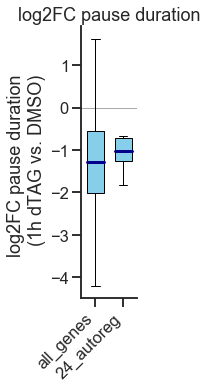

In [68]:
#######################
##### with log2FC #####
#######################

#### log2FC initiation rate
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(1,5))

# plotting all individual
plt.axhline(y=0, color="darkgray", linewidth=1)
#plt.boxplot(x=[np.log2(clean_PI_df['initiation.rate.per.cell.dTAG71h']/clean_PI_df['initiation.rate.per.cell.DMSO1h']), np.log2(SE_464_PI['initiation.rate.per.cell.dTAG71h']/SE_464_PI['initiation.rate.per.cell.DMSO1h']), np.log2(TF_53_PI['initiation.rate.per.cell.dTAG71h']/TF_53_PI['initiation.rate.per.cell.DMSO1h']), np.log2(CRC_29_PI['initiation.rate.per.cell.dTAG71h']/CRC_29_PI['initiation.rate.per.cell.DMSO1h']), np.log2(autoreg_PI['initiation.rate.per.cell.dTAG71h']/autoreg_PI['initiation.rate.per.cell.DMSO1h'])], sym='', labels=["all_genes", "464_SE", "53_TFs", "29_CRC", "24_autoreg"], medianprops=dict(color="darkred", linewidth=3), patch_artist=True, boxprops=dict(facecolor="lightcoral"))
plt.boxplot(x=[np.log2(clean_PI_df['initiation.rate.per.cell.2nddTAG72hNVP230']/clean_PI_df['initiation.rate.per.cell.2nddTAG72h']), np.log2(autoreg_PI['initiation.rate.per.cell.2nddTAG72hNVP230']/autoreg_PI['initiation.rate.per.cell.2nddTAG72h'])], widths=0.6, showfliers=False, labels=["all_genes", "24_autoreg"], medianprops=dict(color="darkblue", linewidth=3), patch_artist=True, boxprops=dict(facecolor="skyblue"))

# formatting
plt.title("log2FC pause duration")
plt.xticks(rotation=45, ha="right")
plt.ylabel('log2FC pause duration \n (1h dTAG vs. DMSO)')
sns.despine()

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\initiation-freq_1h_vs_DMSO_log2FC_all+autoreg_boxplot_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\initiation-freq_1h_vs_DMSO_log2FC_all+autoreg_boxplot_1x5.png', dpi=300)
plt.show()

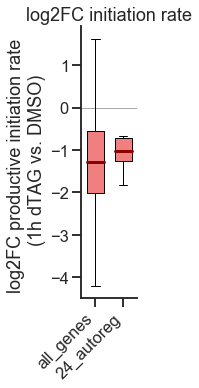

In [30]:
#######################
##### with log2FC #####
#######################

#### log2FC pause duration
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(1,5))

# plotting all individual
plt.axhline(y=0, color="darkgray", linewidth=1)
#plt.boxplot(x=[np.log2(clean_PI_df['initiation.rate.per.cell.dTAG71h']/clean_PI_df['initiation.rate.per.cell.DMSO1h']), np.log2(SE_464_PI['initiation.rate.per.cell.dTAG71h']/SE_464_PI['initiation.rate.per.cell.DMSO1h']), np.log2(TF_53_PI['initiation.rate.per.cell.dTAG71h']/TF_53_PI['initiation.rate.per.cell.DMSO1h']), np.log2(CRC_29_PI['initiation.rate.per.cell.dTAG71h']/CRC_29_PI['initiation.rate.per.cell.DMSO1h']), np.log2(autoreg_PI['initiation.rate.per.cell.dTAG71h']/autoreg_PI['initiation.rate.per.cell.DMSO1h'])], sym='', labels=["all_genes", "464_SE", "53_TFs", "29_CRC", "24_autoreg"], medianprops=dict(color="darkred", linewidth=3), patch_artist=True, boxprops=dict(facecolor="lightcoral"))
plt.boxplot(x=[np.log2(clean_PI_df['pause.duration.2nddTAG72hNVP230']/clean_PI_df['pause.duration.2nddTAG72h']), np.log2(autoreg_PI['pause.duration.2nddTAG72hNVP230']/autoreg_PI['pause.duration.2nddTAG72h'])], widths=0.6, showfliers=False, labels=["all_genes", "24_autoreg"], medianprops=dict(color="darkred", linewidth=3), patch_artist=True, boxprops=dict(facecolor="lightcoral"))

# formatting
plt.title("log2FC initiation rate")
plt.xticks(rotation=45, ha="right")
plt.ylabel('log2FC productive initiation rate \n (1h dTAG vs. DMSO)')
sns.despine()

# save
#plt.savefig(plots_dir + 'pause_initiation_plots\\initiation-freq_1h_vs_DMSO_log2FC_all+autoreg_boxplot_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pause_initiation_plots\\initiation-freq_1h_vs_DMSO_log2FC_all+autoreg_boxplot_1x5.png', dpi=300)
plt.show()

In [38]:
log2FC = np.log2(clean_PI_df['initiation.rate.per.cell.2nddTAG72hNVP230']/clean_PI_df['initiation.rate.per.cell.2nddTAG72h'])

In [45]:
log2FC[log2FC.index.isin(autoreg_PI.index.tolist())].describe()

count    7.000000
mean    -0.915819
std      0.705428
min     -1.827480
25%     -1.266719
50%     -1.023979
75%     -0.728981
max      0.432129
dtype: float64

In [47]:
log2FC.describe()

count    6954.000000
mean       -1.303303
std         1.187295
min        -7.044615
25%        -2.018347
50%        -1.278934
75%        -0.559816
max         3.165624
dtype: float64

In [65]:
clean_PI_df[clean_PI_df.gene_id.str.contains('|'.join(autoreg_24_genes.geneID.tolist()), na=False)]

,chr,strand,start,end,type,source,length,id,initiation.rate.per.cell.2ndDMSO2h,initiation.rate.per.cell.2nddTAG72h,...,pause.duration.2ndDMSO2h,pause.duration.2nddTAG72h,pause.duration.2ndNVP230,pause.duration.2nddTAG72hNVP230,induced,repressed,repressed 3-fold,repressed 5-fold,gene_id,transcript_id
TR03426,chr2,-,60451167,60553498,transcribed_region,REFSEQ_merge,102332,TR03426,1.619674,0.273968,...,0.826527,0.504697,1.644535,0.000000,False,False,False,False,ENSG00000119866,NM_022893 NM_018014 NM_138559
TR04019,chr3,+,4979412,4985180,transcribed_region,REFSEQ_merge,5769,TR04019,0.975340,0.203568,...,2.639114,0.721040,4.411310,2.046810,False,False,False,False,ENSG00000134107,NM_003670
TR07987,chr6,+,135181315,135219173,transcribed_region,REFSEQ_merge,37859,TR07987,19.960654,0.851721,...,0.319783,0.253660,1.442720,0.502353,False,False,False,False,ENSG00000118513 NA,NM_001161657 NM_001130173 NM_001161658 NM_0011...
TR10279,chr8,+,127736069,127741434,transcribed_region,REFSEQ_merge,5366,TR10279,11.127054,0.249855,...,2.229049,13.834011,5.971361,12.222971,False,False,False,False,ENSG00000136997,NM_002467
TR13837,chr11,-,47354858,47378576,transcribed_region,REFSEQ_merge,23719,TR13837,1.225665,0.233072,...,1.506056,0.926674,2.782604,0.637858,False,False,False,False,ENSG00000066336,NM_003120 NM_001080547
TR14410,chr12,+,11649854,11895391,transcribed_region,REFSEQ_merge,245538,TR14410,5.665428,0.838805,...,1.136816,0.409117,1.159855,0.292427,False,False,False,False,ENSG00000139083,NM_001987
TR22763,chr20,-,53567071,53583097,transcribed_region,REFSEQ_merge,16027,TR22763,3.961921,2.766832,...,0.485629,0.234255,0.083021,0.160720,False,False,False,False,ENSG00000171940,NM_006526
